In [1]:
# Import the modules
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# Read the high-resolution image
image_path = 'super_res_img.jpg'
hr_img = Image.open(image_path)

# Downsample by hand
lr_size = 64
lr_img = hr_img.resize((lr_size, lr_size), Image.BICUBIC)

# Save the low-resolution image
lr_img.save('lr_'+image_path)

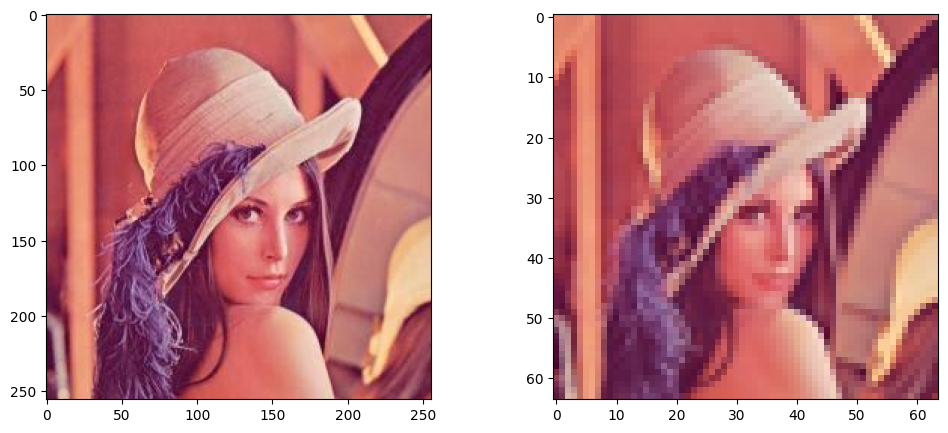

In [3]:
# Display an example
fig, axs = plt.subplots(ncols = 2, figsize = (12, 5))

axs[0].imshow(hr_img)
axs[1].imshow(lr_img)

plt.show()

In [4]:
# Load the ESRGAN model
model_path = 'https://tfhub.dev/captain-pool/esrgan-tf2/1'
model = hub.load(model_path)

In [5]:
def preprocess_image(image_path):
  image = tf.image.decode_image(tf.io.read_file(image_path))
  if image.shape[-1] == 4:
    image = image[...,:-1]
  size = (tf.convert_to_tensor(image.shape[:-1]) // 4) * 4
  image = tf.image.crop_to_bounding_box(image, 0, 0, size[0], size[1])
  image = tf.cast(image, tf.float32)
  return tf.expand_dims(image, 0)

def postprocess_image(image):
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  return image

In [6]:
# Preprocess the image and perform the prediction
original_image = preprocess_image('lr_'+image_path)
fake_image = tf.squeeze(model(original_image))

prediction = postprocess_image(fake_image)

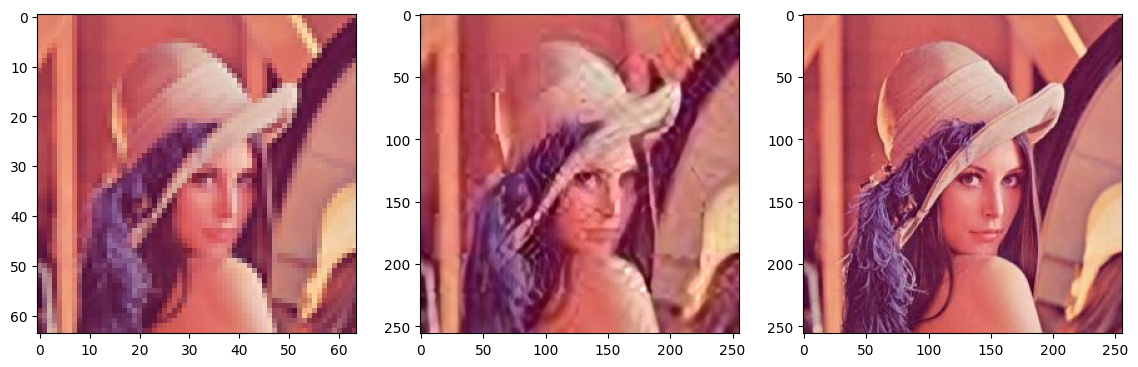

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 10))

ax[0].imshow(lr_img)
ax[1].imshow(prediction)
ax[2].imshow(hr_img)

plt.show()